## Import libraries

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns

## Update parameter

Change this parameter (outlet number) to generate dataset for a different outlet

In [2]:
outlet_number = 3

## Import datasets


In [3]:
purchase_xls = pd.ExcelFile('Master Data (Purchase).xlsx')
sales_xls = pd.ExcelFile('Master Data (Sales).xlsx')

purchase_data_raw = pd.read_excel(purchase_xls, 'Purchase - Outlet {}'.format(outlet_number))
sales_data_raw = pd.read_excel(sales_xls, 'Sales - Outlet {}'.format(outlet_number))

mapping_df = pd.read_csv('Collated dataset - Sheet1.csv')

In [4]:
raw_materials_sku_list = purchase_data_raw['SKU'].unique()
print(len(raw_materials_sku_list))

12


<ipython-input-5-e3c3d4d3eac7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_df['date']= pd.to_datetime(purchase_df['Date of Purchase'])
<ipython-input-5-e3c3d4d3eac7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_df['date']= pd.to_datetime(purchase_df['Date of Purchase'])
<ipython-input-5-e3c3d4d3eac7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

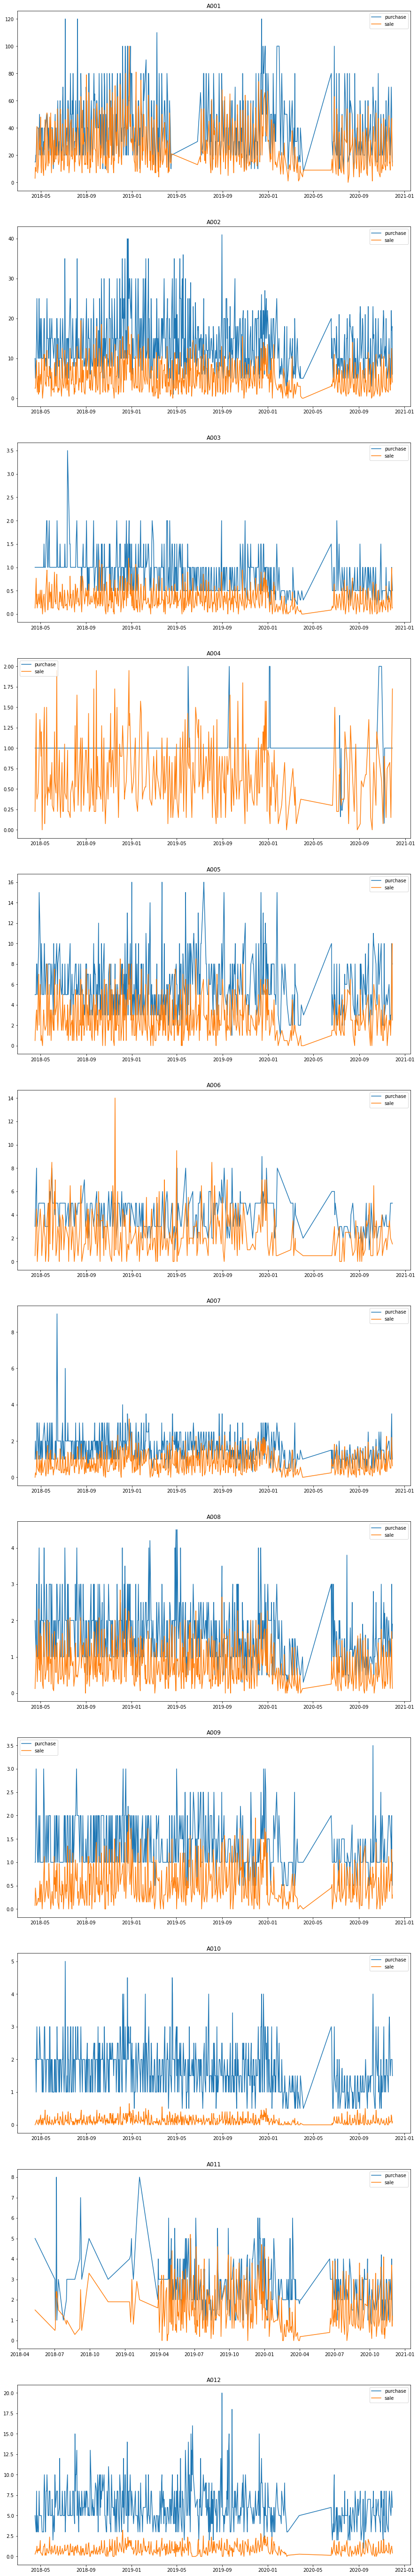

In [5]:
fig, axs = plt.subplots(len(raw_materials_sku_list),figsize=(15,100))
num = 0

for raw_material_sku in raw_materials_sku_list:
    sales_df = pd.read_csv('churned datasets/outlet{}_{}.csv'.format(outlet_number, raw_material_sku))
    purchase_df = purchase_data_raw[purchase_data_raw['SKU'] == raw_material_sku]
    sales_df['date']= pd.to_datetime(sales_df['ds'])
    purchase_df['date']= pd.to_datetime(purchase_df['Date of Purchase'])
    merged_df = pd.merge(sales_df, purchase_df, on="date").drop(['ds', 'Date of Purchase'], axis='columns').sort_values('date')
    axs[num].plot(merged_df['date'], merged_df['Quantity of Order Placed'], label='purchase')
    axs[num].plot(merged_df['date'], merged_df['y'], label='sale')
    axs[num].legend()

    axs[num].set_title(raw_material_sku)
    num += 1